# DS 3000 Lab 2

Due: Tuesday May 20 in-class

### Submission Instructions
Upload this `ipynb` file to GitHub, and then to Gradescope.  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh `Kernel > Restart & Run All` just before uploading the `ipynb` file to GitHub and verify that the correct version is represented on Gradescope.

### Tips for success
- Collaborate: bounce ideas off of each other, if you are having trouble you can ask your classmates or Dr. Gerber for help with specific issues, however...
- [(See)](http://www.northeastern.edu/osccr/academic-integrity), i.e. you are welcome to **talk about/discuss** (*not* show or allow each other to copy your answers to) the problems.

In [1]:
# you may want to use the below modules on this lab
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import requests
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from bs4 import BeautifulSoup
from itertools import zip_longest
import re

# Web Scraping EuroMillions Results

For this problem, we will (together) create a small data set scraped from [Euro-Millions](https://www.euro-millions.com/) which is a lottery that is played across nine European countries. Draws take place on Tuesday and Friday evenings with a minimum guaranteed jackpot of â‚¬17 million.

## Part 1: The Scraper Function (20 points)

Complete the function `get_lottery_html()` below (including docstring) which visits the lottery results for a specific date and grabs the html. Visit [the website](https://www.euro-millions.com/results/) to select a date or two and notice the pattern in the url so that you can pass any date to the function as a string. 

**Make sure to remove the `pass` statement when you are finished**. I have written the code you should run once the function is completed, getting the lottery results from the last day in April.

In [22]:
def get_lottery_html(date):
    """scrapes lottery result data from a specified date
    
    Args:
        date: a string representing the date of lottery info, formatted as DD-MM-YYY
    
    Returns:
        response: the text from a url of lottery info from a specified date
    """
    url = f"https://www.euro-millions.com/results/{date}"
    response = requests.get(url).text
    return response


In [23]:
# when you are done the following code should be run
url_text = get_lottery_html('29-04-2025')

## Part 2: The Soup Function (20 points)

Complete the function `get_country_soup()` below (including docstring) which takes the html from the previous function and outputs one of nine beautiful soup objects, depending on the country you are interested in as defined by the `'id'` attribute:

    - `id='PrizeAT'` (Austria)
    - `id='PrizeBE'` (Belgium)
    - `id='PrizeFR'` (France)
    - `id='PrizeIE'` (Ireland)
    - `id='PrizeLU'` (Luxembourg)
    - `id='PrizePT'` (Portugal)
    - `id='PrizeES'` (Spain)
    - `id='PrizeCH'` (Switzerland)
    - `id='PrizeGB'` (UK)
    
The function should take two arguments: the html object from `get_lottery_html()` and a string that specifies the `id` you are interested in (by default, Belgium or `BE`).
    
**Make sure to remove the `pass` statement when you are finished.** Then, also make sure to run the code to ensure your function works.

In [43]:
def get_country_soup(html, country):
    """finds all information from the html text related to a given tag
    
    Args:
        html: a string, the text that is on the website for a date
        country: a string, the two letter code for the country that we are finding information about on the page

    Returns:
        country_soup[0]: a beautiful soup object for the given country
    """
    soup = BeautifulSoup(html)
    country_soup = soup.find_all(id='Prize' + country)
    return country_soup[0]

In [44]:
# when you are done the following code should be run (feel free to change the country if you wish)
country_choice = 'BE'
my_country_soup = get_country_soup(url_text, country_choice)
my_country_soup

<div id="PrizeBE">
<table class="mobFormat">
<thead>
<tr>
<th>Numbers Matched</th>
<th class="righty">Prize Per Winner</th>
<th class="righty">Belgian Winners</th>
<th class="righty">Prize Fund Amount</th>
<th class="righty">Total Winners</th>
</tr>
</thead>
<tbody>
<tr>
<td class="colour" data-title="Numbers Matched">
<span class="prizeName"><span class="ball">5 </span> + <span class="star"> 2</span></span>
</td>
<td class="righty" data-title="Prize Per Winner">
											€83,786,486.80
											
										</td>
<td class="righty" data-title="Belgian Winners">
												0
												
											</td>
<td class="righty" data-title="Prize Fund Amount">
												€0.00
												
											</td>
<td class="righty" data-title="Total Winners">
<strong style="color:#F00">Rollover!</strong> 
												0
												
										</td>
</tr>
<tr>
<td class="colour" data-title="Numbers Matched">
<span class="prizeName"><span class="ball">5 </span> + <span class="star"> 1</span></span

## Part 3: Cleaning a Country (20 points)

Below is the function `clean_country_df()`, which takes the soup object from the previous function and creates a data frame with the following columns:

    - `balls`: the number of balls matched
    - `stars`: the number of stars matched
    - `ppw`: the prize per winner
    - `country_winners`: how many winners of the prize in the given country
    - `total_winners`: the total number of winners
    - `country`: the country name
    - `currency`: the currency of the lottery

I have written the function and (*given your function from Part 2 works*) it should work. **DO NOT CHANGE ANYTHING IN THE BODY OF THE FUNCTION.**

**In a markdown cell** create a bullet point list where you explain each what each chunk of code does. Your bullet point list should have **THREE** sections, with **NINE** total bullet points/explanations corresponding to the chunks below the `# EXPLAIN THIS (number)` comments. You must accurately summarize the content of each code chunk. **Talking to your neighbors/group about this is highly recommended.**

In [45]:
def clean_country_df(soup, country_name):
    """Takes the soup of a country and cleans it, creating a data frame.
    
    Args:
        soup (soup): the soup from get_country_soup
        country_name (str): name of the country (make sure this matches with the code used in the previous part)
            ** Attention: The country_name must match the country_choice used to create the soup
    Returns:
        clean_country_df (DataFrame): a DataFrame with seven columns corresponding to
            balls matched
            stars matched
            prize per winner
            country winners
            total winners
            country
            currency
    """
    # EXPLAIN THIS (1.1)
    table = soup.find('table')

    # EXPLAIN THIS (1.2)
    headers = [th.get_text(strip=True) for th in table.find('thead').find_all('th')]

    # EXPLAIN THIS (1.3)
    country_winner_index = next((i for i, header in enumerate(headers) if 'Winners' in header and 'Total' not in header), None)

    # EXPLAIN THIS (1.4)
    balls_matched = []
    stars_matched = []
    prize_per_winner = []
    country_winners = []
    total_winners = []
    currencies = []
    
    # Process each row in the table body, excluding the last totals row
    for row in table.find('tbody').find_all('tr')[:-1]:
        columns = row.find_all('td')
        
        # EXPLAIN THIS (2.1)
        numbers_matched = columns[0].get_text(strip=True)
        prize = columns[1].get_text(strip=True)
        country_winner = columns[country_winner_index].get_text(strip=True) if country_winner_index is not None else 'N/A'
        total_winner = columns[-1].get_text(strip=True)
        
        # EXPLAIN THIS (2.2)
        currency_match = re.match(r'^\D*', prize)
        currency = currency_match.group(0) if currency_match else 'N/A'
        currencies.append(currency)
        
        # EXPLAIN THIS (2.3)
        numeric_prize = pd.to_numeric(prize.replace(currency, '').replace(',', ''), errors='coerce')
        
        # EXPLAIN THIS (2.4)
        numbers_split = numbers_matched.split('+')
        balls = pd.to_numeric(numbers_split[0].strip().replace(',', ''), errors='coerce')
        stars = pd.to_numeric(numbers_split[1].strip().replace(',', ''), errors='coerce') if len(numbers_split) > 1 else 0

        balls_matched.append(balls)
        stars_matched.append(stars)
        prize_per_winner.append(numeric_prize)
        country_winners.append(pd.to_numeric(country_winner.replace(',', ''), errors='coerce'))
        total_winners.append(pd.to_numeric(total_winner.replace(',', ''), errors='coerce'))
    
    # EXPLAIN THIS (3)
    data = {
        'balls': balls_matched,
        'stars': stars_matched,
        'ppw': prize_per_winner,
        'country_winners': country_winners,
        'total_winners': total_winners,
        'country': [country_name] * len(balls_matched),
        'currency': currencies
    }
    
    clean_country_df = pd.DataFrame(data)
    
    return clean_country_df

# Example usage
clean_df = clean_country_df(my_country_soup, 'BE')
clean_df

,balls,stars,ppw,country_winners,total_winners,country,currency
0,5,2,83786486.8,0,NaN,BE,€
1,5,1,0.0,0,0.0,BE,€
2,5,0,65420.2,3,11.0,BE,€
3,4,2,1326.9,4,32.0,BE,€
4,4,1,129.2,54,605.0,BE,€
5,3,2,71.5,107,1156.0,BE,€
6,4,0,38.6,107,1502.0,BE,€
7,2,2,17.2,1301,16848.0,BE,€
8,3,1,12.5,1904,25854.0,BE,€
9,3,0,8.9,4780,67339.0,BE,€


Your answer in this cell:
- Explain Code Chunks 1:
  
    - This finds the first table that is included in the html content.
    - For each 'th' tag inside a 'thead' tag within the passed in table, the text is stripped and put in a list called 'headers'.
    - This line iterates through the indices of the headers list, adding the index to country_winner_index if the string 'Winner' is in the header and 'Total' is not.
    - This initializes an empty list for each feature in the final DataFrame.

- Explain Code Chunks 2:
  
    - Each td tag in the current row represents a column. Get all the text from each tag, strip it of miscellaneous characters, and assign it to a variable saying what column it corresponds to.
    - Takes any characters that correspond to a currency, groups them together and adds the currency strings to a list.
    - Converts currencies to a numeric type; takes out commas and the formatting symbols.
    - Splits the balls and stars into their separate values, removes all miscellaneous characters, and adds all reformatted values to the appropriate lists.

- Explain Code Chunk 3:

    - Creates a dictionary with all the keys being column names and values being the lists of their values. The country column determines how many rows will be included. Then all this information is put into a pandas DataFrame.

## Part 4: Stacking the Countries (20 points)

Complete the function `stack_countries_df()` below (including docstring) which takes as an argument a list of country codes (strings) and a list of dates (strings), and uses the functions from the previous three parts to create a single data frame with results across those countries and dates. There may be multiple ways to do this, but one way could be to first loop through the dates, use the `get_lottery_html()` function, then loop through the countries and apply the other two functions. You will also want to add a column with the date information to the final data frame.

**Make sure to remove the `pass` statement when you are finished.** Then, also make sure to run the code to ensure your function works.

In [114]:
def stack_countries_df(country_list, date_list):
    """Cleans the relevant data and creates a DataFrame using given lists of countries and dates.
    
        Args:
            country_list: a list of country codes (strings) representing countries the function stores results from
            date_list: a list of dates (strings) that the function stores results from
        Returns:
            big_df: a pandas DataFrame of relevant data from all countries in country_list and all dates in date_list
    """
    # make an empty df
    big_df = pd.DataFrame()

    # loop through each date and get the url text
    for date in date_list:
        url_text = get_lottery_html(date)

        # get the cleaned data for each relevant country and add it to big_df
        for country in country_list:
            soup = get_country_soup(url_text, country)
            country_df = clean_country_df(soup, country)
            country_df.loc[:, 'date'] = date
            big_df = pd.concat([big_df, country_df])
            
    return big_df


In [115]:
country_codes = ['BE', 'GB', 'CH']
dates = ['25-04-2025', '29-04-2025']
combined_df = stack_countries_df(country_codes, dates)
combined_df

,balls,stars,ppw,country_winners,total_winners,country,currency,date
0,5,2,74400108.10,0,NaN,BE,€,25-04-2025
1,5,1,148333.50,0,5.0,BE,€,25-04-2025
2,5,0,34667.90,0,5.0,BE,€,25-04-2025
3,4,2,1316.80,3,41.0,BE,€,25-04-2025
4,4,1,142.80,82,696.0,BE,€,25-04-2025
...,...,...,...,...,...,...,...,...
8,3,1,26.75,1610,25854.0,CH,CHF,29-04-2025
9,3,0,19.10,4429,67339.0,CH,CHF,29-04-2025
10,1,2,17.50,5542,89036.0,CH,CHF,29-04-2025
11,2,1,13.15,24107,373985.0,CH,CHF,29-04-2025


## Part 5: EDA and Data Viz (20 points)

The first code cell below runs your function from part 4 to get the lottery results for Belgium and France over the month of April 2025. Use this data frame to:

- Create a subset which contains only the 4 ball, 0 star winners
- Plot a line plot that compares the number of 4 ball, 0 star winners for in Belgium and France over April

**Then, in a markdown cell** discuss briefly what this plot tells you, if anything.

In [116]:
country_codes = ['BE', 'FR']
dates = ['01-04-2025', '04-04-2025', '08-04-2025', 
         '11-04-2025', '15-04-2025', '18-04-2025', 
         '22-04-2025', '25-04-2025', '29-04-2025']
combined_df = stack_countries_df(country_codes, dates)

In [117]:
combined_df.tail()

,balls,stars,ppw,country_winners,total_winners,country,currency,date
18,0,NaN,12.4,14325,14325.0,FR,€,29-04-2025
19,2,1.0,6.1,76684,373985.0,FR,€,29-04-2025
20,2,NaN,2.7,37303,37303.0,FR,€,29-04-2025
21,2,0.0,3.8,209656,972679.0,FR,€,29-04-2025
22,0,NaN,2.7,321126,321126.0,FR,€,29-04-2025


In [118]:
# Create the subset here
combined_df = combined_df[(combined_df['balls'] == 4) & (combined_df['stars'] == 0)]
combined_df

,balls,stars,ppw,country_winners,total_winners,country,currency,date
6,4,0.0,53.2,75,998.0,BE,€,01-04-2025
10,4,0.0,53.2,226,998.0,FR,€,01-04-2025
6,4,0.0,49.2,137,1386.0,BE,€,04-04-2025
10,4,0.0,49.2,259,1386.0,FR,€,04-04-2025
6,4,0.0,56.5,52,858.0,BE,€,08-04-2025
10,4,0.0,56.5,175,858.0,FR,€,08-04-2025
6,4,0.0,49.2,101,1336.0,BE,€,11-04-2025
10,4,0.0,49.2,292,1336.0,FR,€,11-04-2025
6,4,0.0,49.5,58,1042.0,BE,€,15-04-2025
10,4,0.0,49.5,197,1042.0,FR,€,15-04-2025


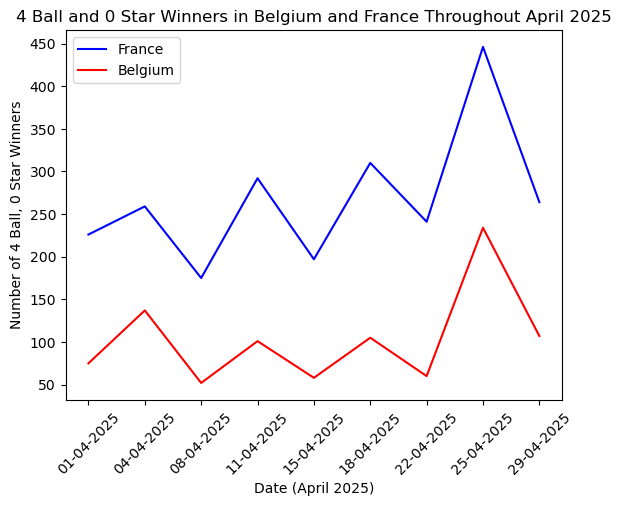

In [127]:
# Create the line plot here (you may use matplotlib or plotly)

# create separate DataFrames for France and Belgium
france_df = combined_df[combined_df['country'] == 'FR']
belgium_df = combined_df[combined_df['country'] == 'BE']

# initialize empty lists to store winner counts
france_counts = []
belgium_counts = []

# for each date, add the number of winners from each country on that date to the corresponding list
for i in range(len(dates)):
    france_counts.append(france_df[france_df['date'] == dates[i]]['country_winners'].sum())
    belgium_counts.append(belgium_df[belgium_df['date'] == dates[i]]['country_winners'].sum())

# plot dates and winner counts for both countries
plt.plot(dates, france_counts, color='blue', label='France')
plt.plot(dates, belgium_counts, color='red', label='Belgium')

# add axis labels and title; rotate x tick labels
plt.xlabel('Date (April 2025)')
plt.ylabel('Number of 4 Ball, 0 Star Winners')
plt.title('4 Ball and 0 Star Winners in Belgium and France Throughout April 2025')
plt.xticks(rotation=45)

plt.legend()
plt.show()

**Type your brief description here**

This plot tells me that throughout the month of April 2025, there were always more 4 ball 0 star winners in France than in Belgium; however, the fluctuations in winner counts for both countries were extremely similar. Both followed a zigzag pattern, with counts going up and down consistently but with a high peak near the end of the month that quicly fell back down. Both countries experienced cycles of an increase in winners over four days, then a drop over the next four.